Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


In [1]:
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
diabetes_data = pd.read_csv(url)

# Display the first few rows
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
# Descriptive statistics
diabetes_data.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C:\Users\swast\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


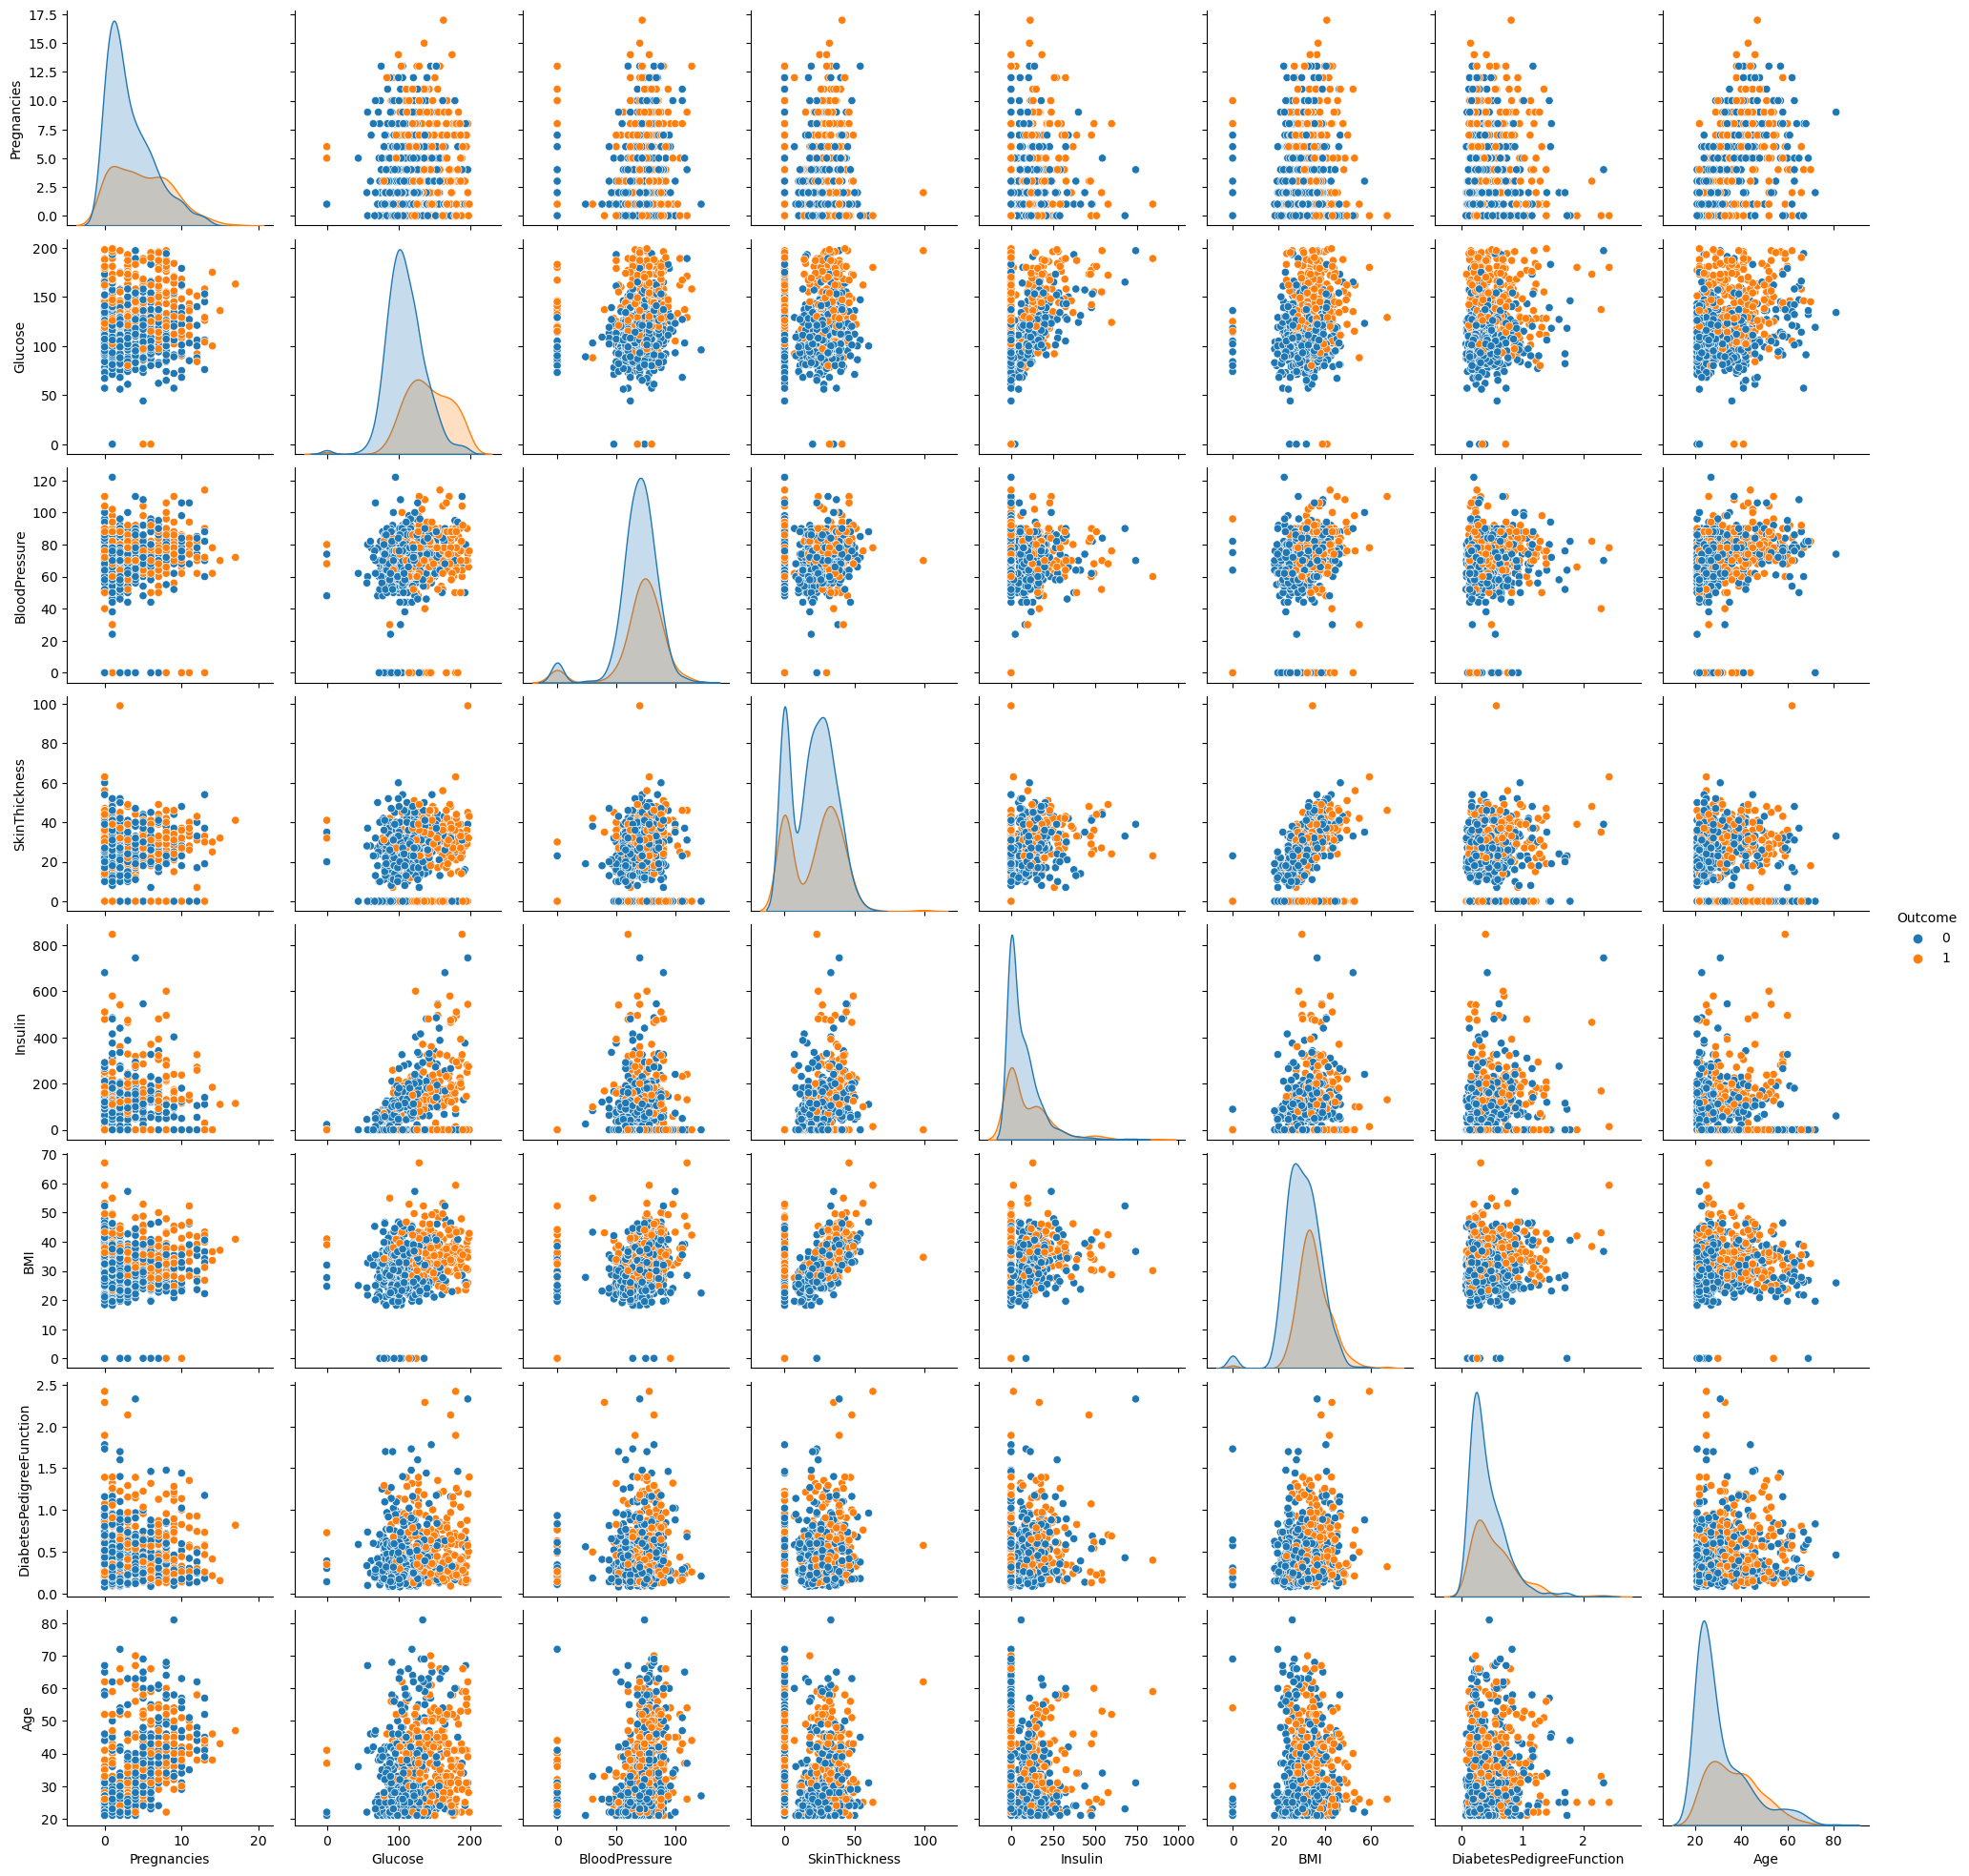

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of variables
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.show()


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
diabetes_data = pd.read_csv(url)

# Display the initial data info
print("Initial Data Info:")
print(diabetes_data.info())

# Handling missing values
missing_value_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[missing_value_cols] = diabetes_data[missing_value_cols].replace(0, pd.NA)

# Use SimpleImputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')
diabetes_data[missing_value_cols] = imputer.fit_transform(diabetes_data[missing_value_cols])

# Display data info after handling missing values
print("\nData Info after Handling Missing Values:")
print(diabetes_data.info())

# Removing outliers (Example: Using z-score method)
z_scores = (diabetes_data - diabetes_data.mean()) / diabetes_data.std()
outliers = (z_scores > 3) | (z_scores < -3)
diabetes_data_no_outliers = diabetes_data[~outliers.any(axis=1)]

# Display data info after removing outliers
print("\nData Info after Removing Outliers:")
print(diabetes_data_no_outliers.info())

# Transforming categorical variables into dummy variables (if necessary)
# Assuming there are no categorical variables in this dataset, so no transformation needed.


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


TypeError: float() argument must be a string or a real number, not 'NAType'

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [10]:
# **Splitting the Dataset:**


from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.


C:\Users\swast\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


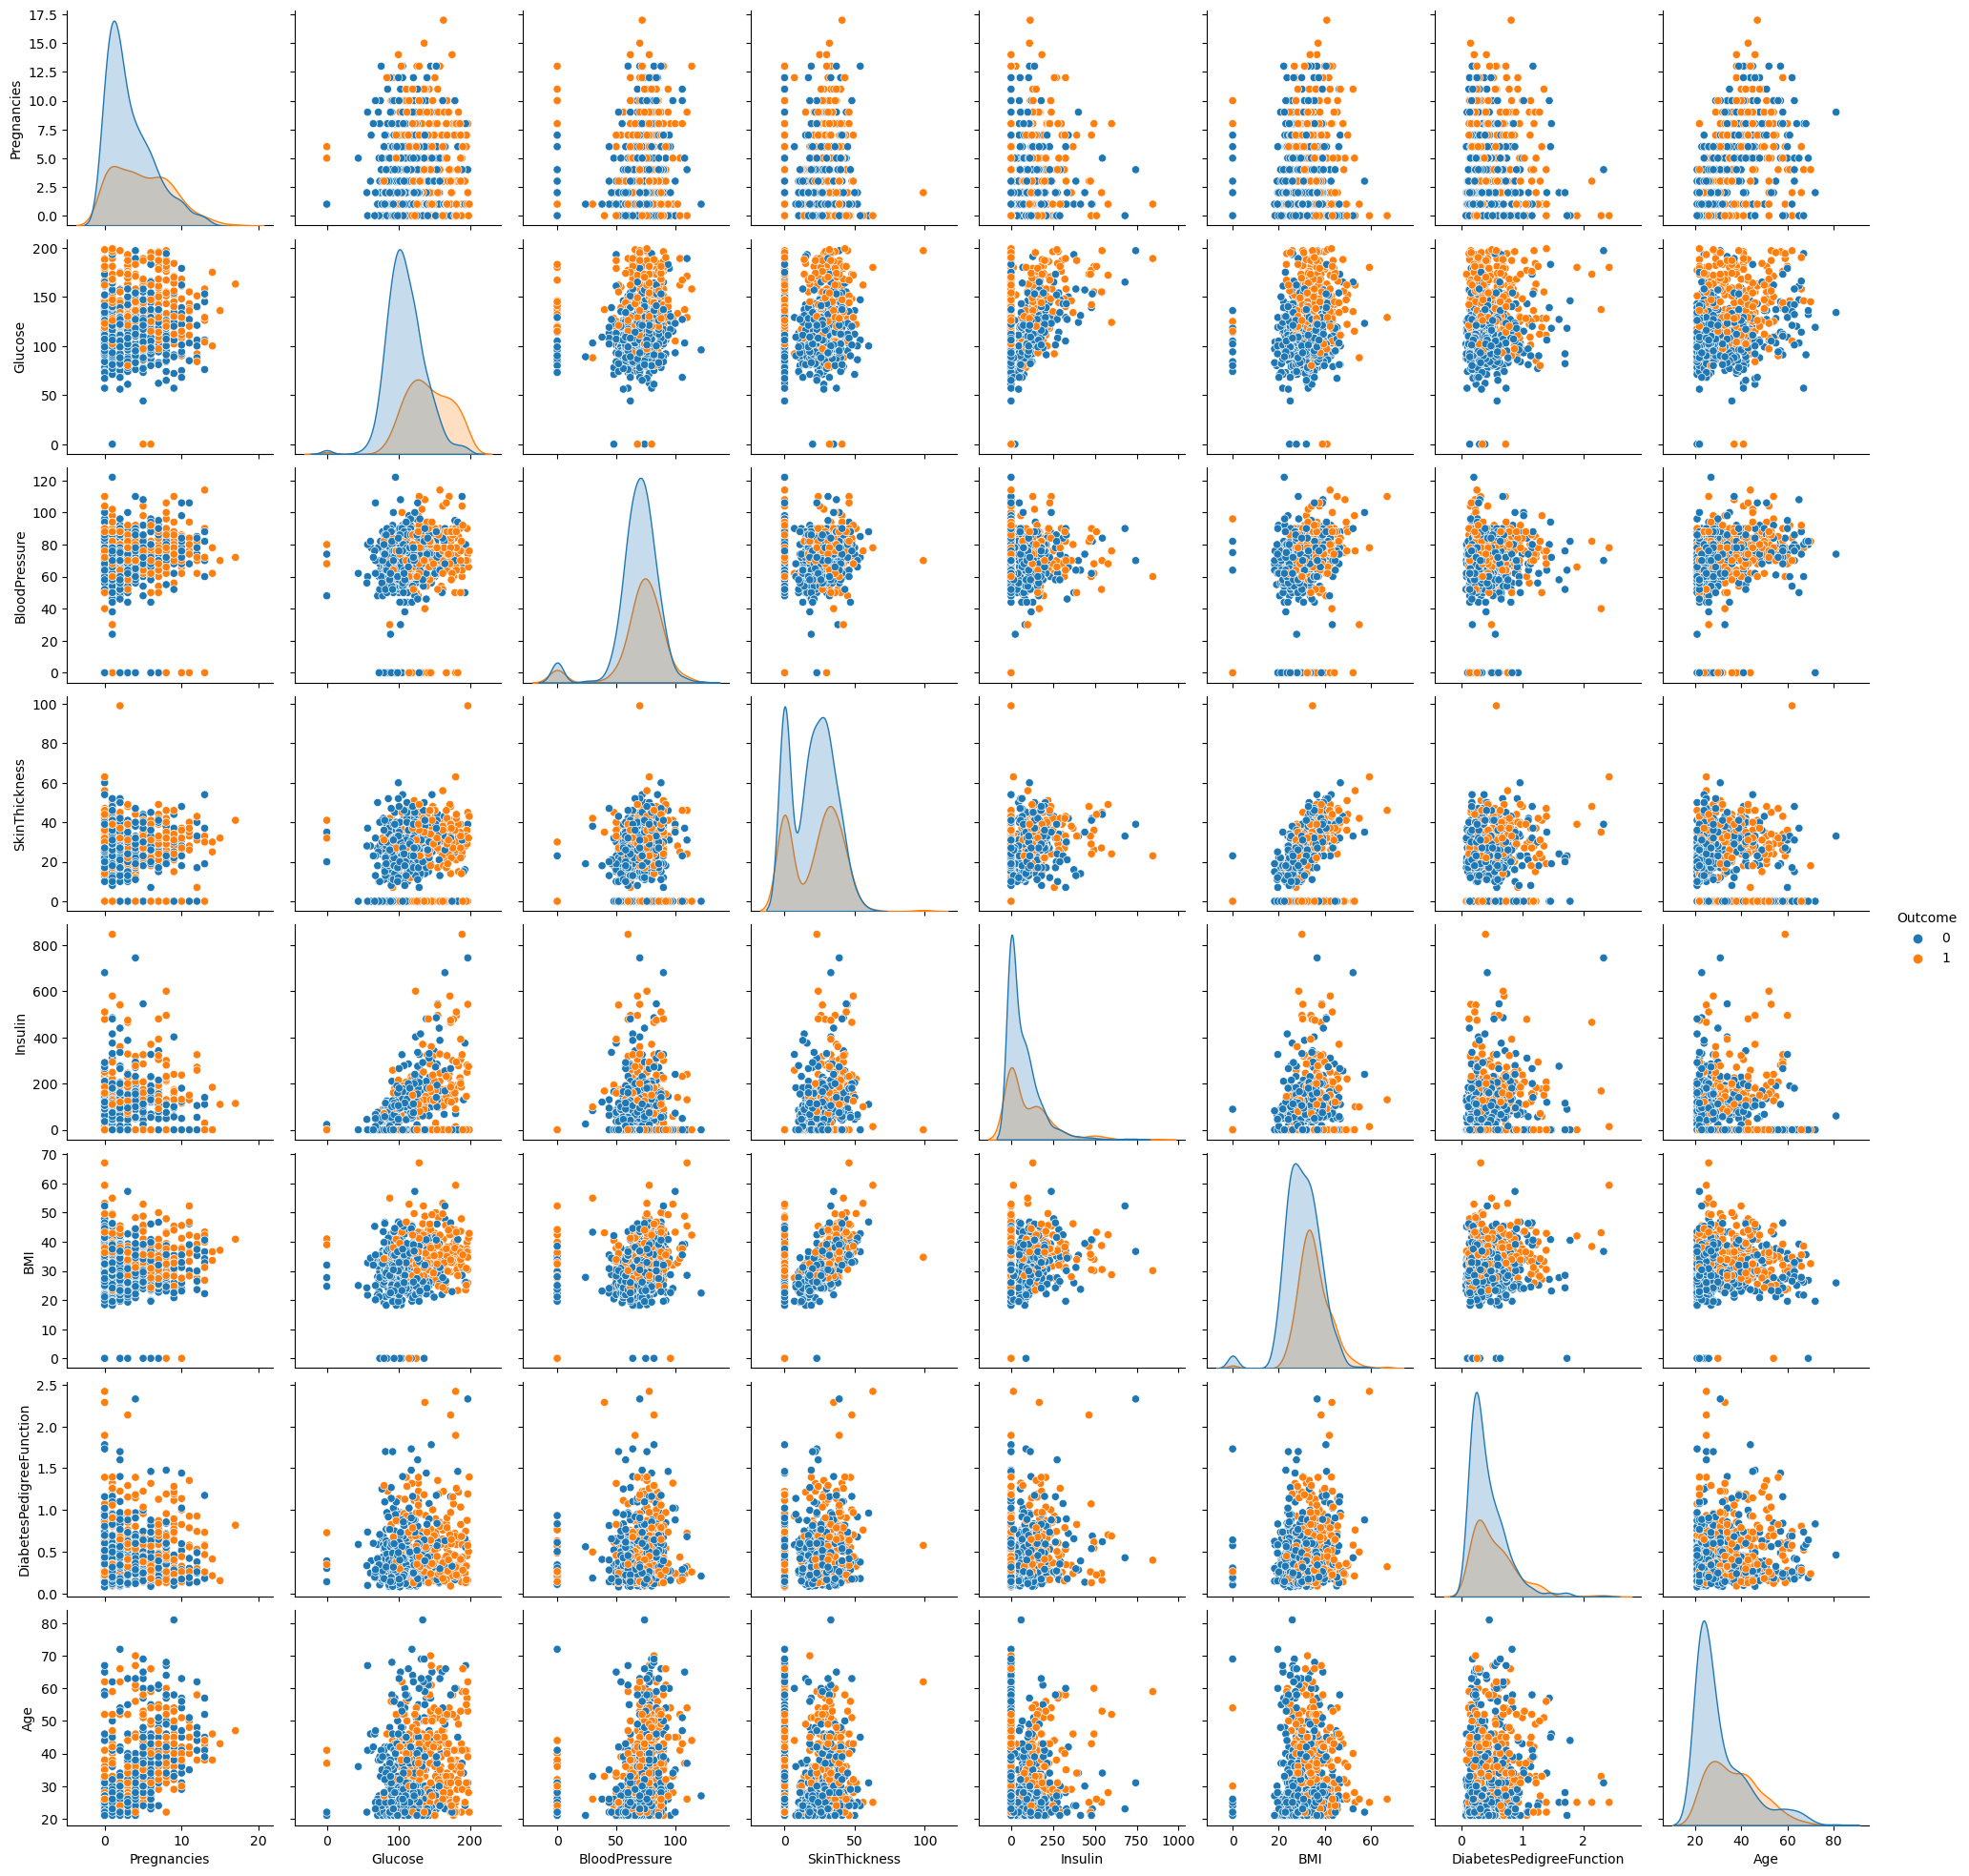

DecisionTreeClassifier(max_depth=3)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?id=1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2'
diabetes_data = pd.read_csv(url)

# Display the first few rows
diabetes_data.head()

# Descriptive statistics
diabetes_data.describe()

# Visualizing the distribution of variables
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.show()

# Handling missing values by imputation
diabetes_data.fillna(diabetes_data.mean(), inplace=True)

# Removing outliers (you can customize this based on your criteria)
# (Code for outlier removal)

# Transforming categorical variables into dummy variables if necessary
# (Code for dummy variable creation)
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters for grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


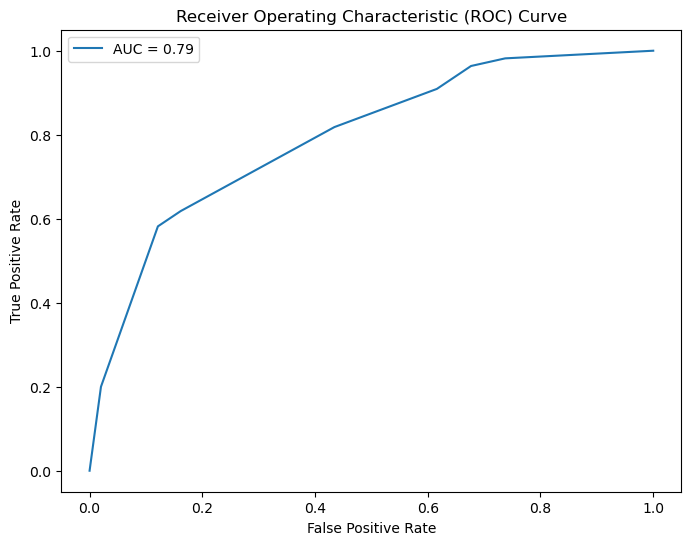

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.


In [15]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Print decision tree rules and splits
tree_rules = export_text(best_dt_classifier, feature_names=list(X_train.columns))
print("Decision Tree Rules:\n", tree_rules)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, feature_names=list(X_train.columns), class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()


Decision Tree Rules:
 |--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 146.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  146.50
|   |   |   |--- class: 1
|   |--- BMI >  29.95
|   |   |--- Glucose <= 165.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  165.50
|   |   |   |--- class: 1



Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate the model on the test set
y_pred = best_dt_classifier.predict(X_test)

# Display classification report, confusion matrix, and ROC AUC score
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[83 16]
 [21 34]]
ROC AUC Score: 0.7282828282828282


In [17]:
# Perform sensitivity analysis on a sample
sample_instance = X_test.iloc[0:1, :]
perturbed_instance = sample_instance.copy()
perturbed_instance['Glucose'] += 5  # Introduce a small change to the Glucose level

# Predict with the original and perturbed instances
original_prediction = best_dt_classifier.predict(sample_instance)
perturbed_prediction = best_dt_classifier.predict(perturbed_instance)

print("Original Prediction:", original_prediction)
print("Perturbed Prediction:", perturbed_prediction)


Original Prediction: [0]
Perturbed Prediction: [0]


In [18]:
# Test the model on specific scenarios
scenario_instance_1 = pd.DataFrame({'Pregnancies': [0], 'Glucose': [200], 'BloodPressure': [70], 'SkinThickness': [30], 'Insulin': [150],
                                    'BMI': [25], 'DiabetesPedigreeFunction': [0.5], 'Age': [35]})
scenario_instance_2 = pd.DataFrame({'Pregnancies': [5], 'Glucose': [80], 'BloodPressure': [90], 'SkinThickness': [20], 'Insulin': [80],
                                    'BMI': [35], 'DiabetesPedigreeFunction': [0.3], 'Age': [50]})

# Predict with the scenario instances
scenario_prediction_1 = best_dt_classifier.predict(scenario_instance_1)
scenario_prediction_2 = best_dt_classifier.predict(scenario_instance_2)

print("Scenario 1 Prediction:", scenario_prediction_1)
print("Scenario 2 Prediction:", scenario_prediction_2)


Scenario 1 Prediction: [1]
Scenario 2 Prediction: [0]
